# Dataset Exploration Notebook

This notebook provides comprehensive exploration of the delivery dataset.

## Quick Start
1. **Change the dataset path** in the configuration cell below
2. Run all cells to see full analysis
3. Review visualizations and statistics


In [33]:
# === DATASET SELECTION ===
# Change this path to explore different datasets
DATASET_PATH = "../data/improved_delivery_data.csv"  # New improved dataset
# DATASET_PATH = "../data/synthetic_delivery_data.csv"  # Original synthetic
# DATASET_PATH = "../data/cleaned_delivery_data.csv"   # Cleaned original

print(f"📁 Dataset: {DATASET_PATH}")


📁 Dataset: ../data/improved_delivery_data.csv


In [34]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('ggplot')
sns.set_palette("husl")

print("✅ Libraries imported")


✅ Libraries imported


## 1. Data Loading & Overview


In [19]:
# Load dataset
df = pd.read_csv(DATASET_PATH)

print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\nShape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "-" * 80)
print("First 5 rows:")
print("-" * 80)
df.head()


DATASET OVERVIEW

Shape: (233848, 18)
Columns: ['route_id', 'driver_id', 'stop_id', 'address_id', 'week_id', 'country', 'day_of_week', 'indexp', 'indexa', 'arrived_time', 'earliest_time', 'latest_time', 'distancep', 'distancea', 'depot', 'delivery', 'delay_minutes', 'delay_flag']

Memory usage: 75.63 MB

--------------------------------------------------------------------------------
First 5 rows:
--------------------------------------------------------------------------------


,route_id,driver_id,stop_id,address_id,week_id,country,day_of_week,indexp,indexa,arrived_time,earliest_time,latest_time,distancep,distancea,depot,delivery,delay_minutes,delay_flag
0,1,85,0,804,47,1,Wednesday,1,1,08:02:02,07:32:02,08:32:02,4.00,3.60,1,0,0.0,0
1,1,85,1,2679,47,1,Wednesday,2,2,08:26:31,07:56:31,08:56:31,9.69,8.08,0,1,0.0,0
2,1,85,2,4033,47,1,Wednesday,3,3,08:46:39,08:16:39,09:16:39,17.46,15.60,0,1,0.0,0
3,1,85,3,8996,47,1,Wednesday,4,4,09:11:29,08:11:29,10:11:29,20.90,19.86,0,1,0.0,0
4,1,85,4,7141,47,1,Wednesday,5,5,09:27:10,08:57:10,09:57:10,25.85,28.64,0,1,0.0,0


In [20]:
# Data types and info
print("=" * 80)
print("DATA TYPES & INFO")
print("=" * 80)
print(df.info())

print("\n" + "-" * 80)
print("Missing Values:")
print("-" * 80)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values")
else:
    print(missing[missing > 0])


DATA TYPES & INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233848 entries, 0 to 233847
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   route_id       233848 non-null  int64  
 1   driver_id      233848 non-null  int64  
 2   stop_id        233848 non-null  int64  
 3   address_id     233848 non-null  int64  
 4   week_id        233848 non-null  int64  
 5   country        233848 non-null  int64  
 6   day_of_week    233848 non-null  object 
 7   indexp         233848 non-null  int64  
 8   indexa         233848 non-null  int64  
 9   arrived_time   233848 non-null  object 
 10  earliest_time  233848 non-null  object 
 11  latest_time    233848 non-null  object 
 12  distancep      233848 non-null  float64
 13  distancea      233848 non-null  float64
 14  depot          233848 non-null  int64  
 15  delivery       233848 non-null  int64  
 16  delay_minutes  233848 non-null  float64
 17  delay_flag 

## 2. Summary Statistics


In [21]:
# Numerical features summary
print("=" * 80)
print("NUMERICAL FEATURES SUMMARY")
print("=" * 80)
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].describe())


NUMERICAL FEATURES SUMMARY
            route_id      driver_id        stop_id     address_id  \
count  233848.000000  233848.000000  233848.000000  233848.000000   
mean     6000.028309     100.909621       9.829842    4998.312776   
std      3461.724164      57.642622       6.536172    2883.085362   
min         1.000000       1.000000       0.000000       0.000000   
25%      3003.000000      51.000000       4.000000    2507.000000   
50%      6008.000000     100.000000       9.000000    5004.000000   
75%      8993.000000     151.000000      15.000000    7499.000000   
max     12000.000000     200.000000      29.000000    9999.000000   

             week_id        country         indexp         indexa  \
count  233848.000000  233848.000000  233848.000000  233848.000000   
mean       25.295145       1.494774      10.829842      10.899075   
std        14.970252       0.499974       6.536172       6.537423   
min         0.000000       1.000000       1.000000       1.000000   
25%   

In [22]:
# Categorical features summary
print("=" * 80)
print("CATEGORICAL FEATURES SUMMARY")
print("=" * 80)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 5 values:")
    print(df[col].value_counts().head())


CATEGORICAL FEATURES SUMMARY

day_of_week:
  Unique values: 7
  Top 5 values:
day_of_week
Saturday    34040
Tuesday     33836
Friday      33648
Sunday      33646
Monday      33595
Name: count, dtype: int64

arrived_time:
  Unique values: 40030
  Top 5 values:
arrived_time
11:13:55    22
11:44:34    22
10:38:38    22
11:41:43    22
10:31:38    22
Name: count, dtype: int64

earliest_time:
  Unique values: 40140
  Top 5 values:
earliest_time
11:15:54    24
11:08:31    23
11:05:43    22
11:36:10    22
10:25:04    22
Name: count, dtype: int64

latest_time:
  Unique values: 40150
  Top 5 values:
latest_time
10:19:42    23
12:08:31    22
11:30:51    22
11:38:48    21
12:02:01    21
Name: count, dtype: int64


## 3. Target Variable Analysis


TARGET VARIABLE: DELAY FLAG

Delay rate: 21.51%
On-time rate: 78.49%

Counts:
delay_flag
0    183544
1     50304
Name: count, dtype: int64


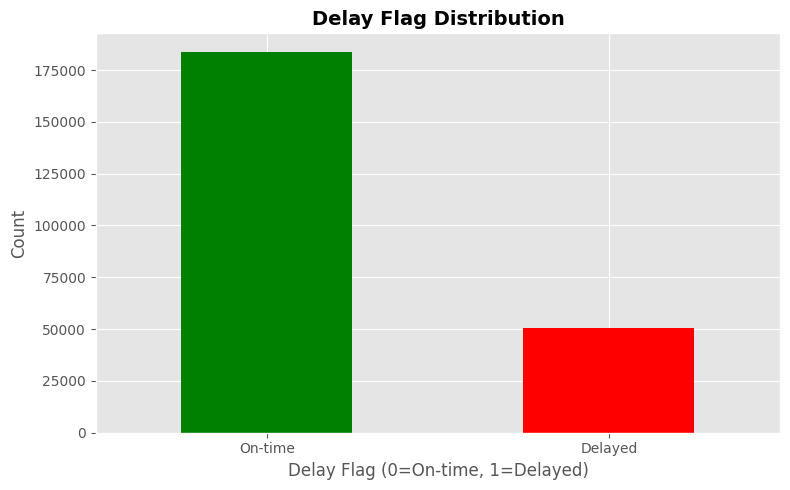

In [23]:
# Prepare target variables if not already present
if 'delay_minutes' not in df.columns or 'delay_flag' not in df.columns:
    # Parse time columns
    time_cols = ["arrived_time", "earliest_time", "latest_time"]
    for col in time_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format='%H:%M:%S', errors='coerce')
    
    # Calculate delays
    if 'latest_time' in df.columns and 'arrived_time' in df.columns:
        df['delay_minutes'] = np.maximum(0, (df['arrived_time'] - df['latest_time']).dt.total_seconds() / 60)
        df['delay_flag'] = (df['delay_minutes'] > 0).astype(int)
    else:
        print("⚠️  Time columns not found. Using pre-computed delay columns if available.")

# Delay flag distribution
print("=" * 80)
print("TARGET VARIABLE: DELAY FLAG")
print("=" * 80)
if 'delay_flag' in df.columns:
    delay_rate = df['delay_flag'].mean()
    print(f"\nDelay rate: {delay_rate:.2%}")
    print(f"On-time rate: {1-delay_rate:.2%}")
    print(f"\nCounts:")
    print(df['delay_flag'].value_counts().sort_index())
    
    # Visualization
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    df['delay_flag'].value_counts().sort_index().plot(kind='bar', ax=ax, color=['green', 'red'])
    ax.set_title('Delay Flag Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel('Delay Flag (0=On-time, 1=Delayed)')
    ax.set_ylabel('Count')
    ax.set_xticklabels(['On-time', 'Delayed'], rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  delay_flag column not found")


TARGET VARIABLE: DELAY MINUTES

Overall Statistics:
  Mean: 3.61 minutes
  Median: 0.00 minutes
  Std: 9.96 minutes
  Min: 0.00 minutes
  Max: 180.00 minutes

For DELAYED stops only:
  Mean: 16.76 minutes
  Median: 12.21 minutes
  Std: 15.52 minutes


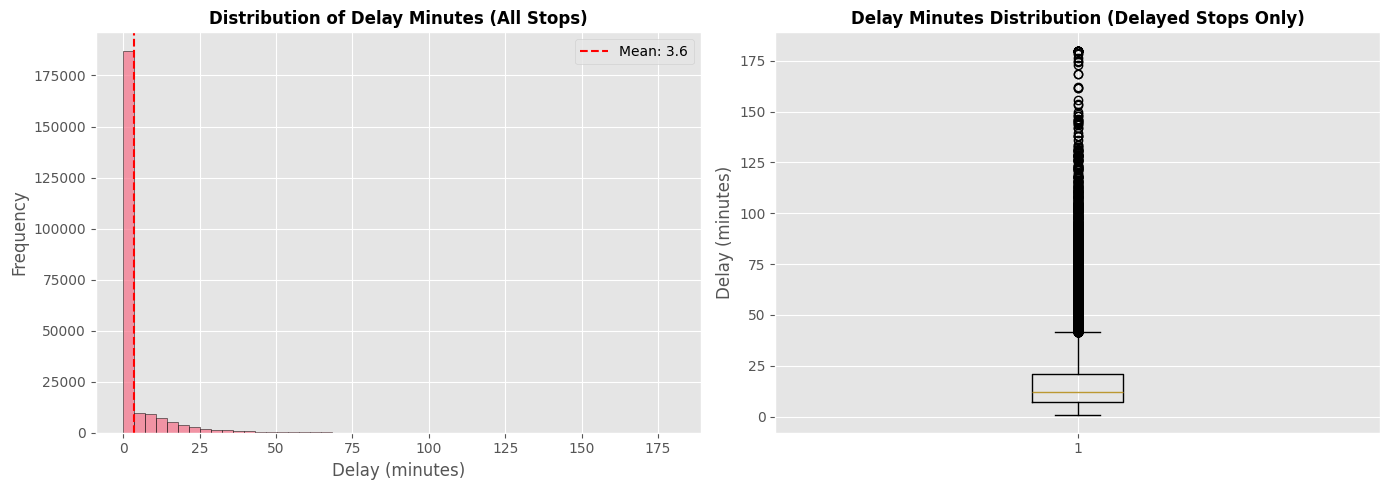

In [24]:
# Delay minutes distribution
print("=" * 80)
print("TARGET VARIABLE: DELAY MINUTES")
print("=" * 80)
if 'delay_minutes' in df.columns:
    delayed_df = df[df['delay_minutes'] > 0]
    
    print(f"\nOverall Statistics:")
    print(f"  Mean: {df['delay_minutes'].mean():.2f} minutes")
    print(f"  Median: {df['delay_minutes'].median():.2f} minutes")
    print(f"  Std: {df['delay_minutes'].std():.2f} minutes")
    print(f"  Min: {df['delay_minutes'].min():.2f} minutes")
    print(f"  Max: {df['delay_minutes'].max():.2f} minutes")
    
    if len(delayed_df) > 0:
        print(f"\nFor DELAYED stops only:")
        print(f"  Mean: {delayed_df['delay_minutes'].mean():.2f} minutes")
        print(f"  Median: {delayed_df['delay_minutes'].median():.2f} minutes")
        print(f"  Std: {delayed_df['delay_minutes'].std():.2f} minutes")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axes[0].hist(df['delay_minutes'], bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribution of Delay Minutes (All Stops)', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Delay (minutes)')
    axes[0].set_ylabel('Frequency')
    axes[0].axvline(df['delay_minutes'].mean(), color='red', linestyle='--', label=f'Mean: {df["delay_minutes"].mean():.1f}')
    axes[0].legend()
    
    # Box plot for delayed stops only
    if len(delayed_df) > 0:
        axes[1].boxplot(delayed_df['delay_minutes'], vert=True)
        axes[1].set_title('Delay Minutes Distribution (Delayed Stops Only)', fontsize=12, fontweight='bold')
        axes[1].set_ylabel('Delay (minutes)')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  delay_minutes column not found")


## 4. Feature Distributions


DISTANCE METRICS


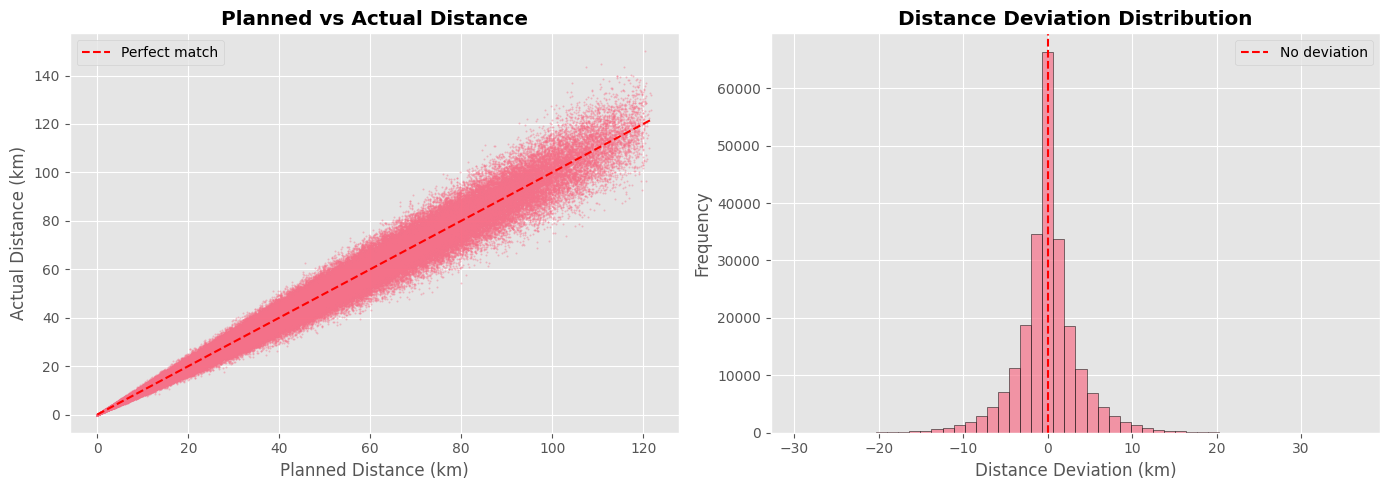


Distance Statistics:
  Planned - Mean: 39.41 km, Std: 26.63 km
  Actual - Mean: 39.41 km, Std: 26.92 km
  Deviation - Mean: 0.00 km, Std: 3.81 km


In [25]:
# Distance metrics
print("=" * 80)
print("DISTANCE METRICS")
print("=" * 80)

if 'distancep' in df.columns and 'distancea' in df.columns:
    df['distance_deviation'] = df['distancea'] - df['distancep']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Planned vs Actual
    axes[0].scatter(df['distancep'], df['distancea'], alpha=0.3, s=1)
    axes[0].plot([df['distancep'].min(), df['distancep'].max()], 
                 [df['distancep'].min(), df['distancep'].max()], 
                 'r--', label='Perfect match')
    axes[0].set_xlabel('Planned Distance (km)')
    axes[0].set_ylabel('Actual Distance (km)')
    axes[0].set_title('Planned vs Actual Distance', fontweight='bold')
    axes[0].legend()
    
    # Distance deviation
    axes[1].hist(df['distance_deviation'], bins=50, edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Distance Deviation (km)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Distance Deviation Distribution', fontweight='bold')
    axes[1].axvline(0, color='red', linestyle='--', label='No deviation')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nDistance Statistics:")
    print(f"  Planned - Mean: {df['distancep'].mean():.2f} km, Std: {df['distancep'].std():.2f} km")
    print(f"  Actual - Mean: {df['distancea'].mean():.2f} km, Std: {df['distancea'].std():.2f} km")
    print(f"  Deviation - Mean: {df['distance_deviation'].mean():.2f} km, Std: {df['distance_deviation'].std():.2f} km")


ROUTE SIZE DISTRIBUTION

Route Size Statistics:
  Mean: 19.5 stops
  Median: 19.0 stops
  Min: 10 stops
  Max: 30 stops
  Std: 4.8 stops


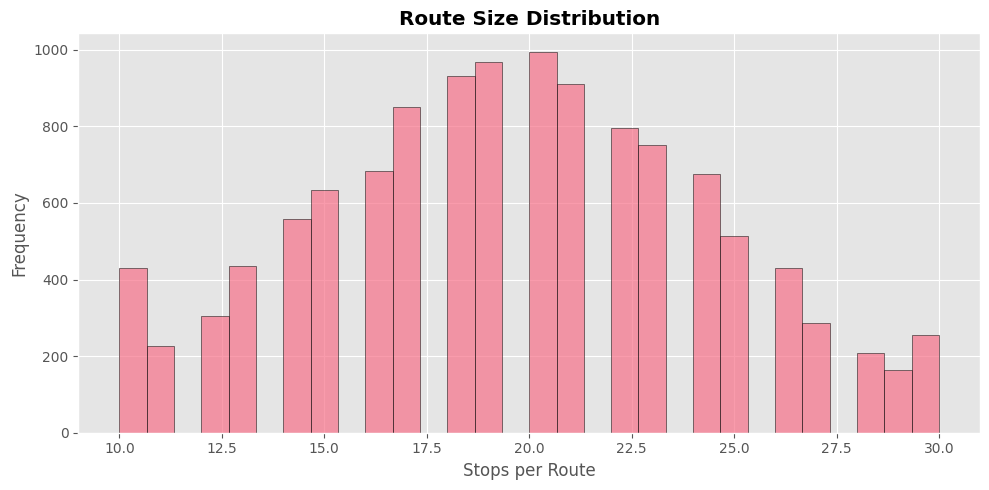

In [26]:
# Route size distribution
print("=" * 80)
print("ROUTE SIZE DISTRIBUTION")
print("=" * 80)

if 'route_id' in df.columns:
    route_sizes = df.groupby('route_id').size()
    
    print(f"\nRoute Size Statistics:")
    print(f"  Mean: {route_sizes.mean():.1f} stops")
    print(f"  Median: {route_sizes.median():.1f} stops")
    print(f"  Min: {route_sizes.min()} stops")
    print(f"  Max: {route_sizes.max()} stops")
    print(f"  Std: {route_sizes.std():.1f} stops")
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    route_sizes.hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Stops per Route')
    ax.set_ylabel('Frequency')
    ax.set_title('Route Size Distribution', fontweight='bold')
    plt.tight_layout()
    plt.show()


## 5. Correlation Analysis


FEATURE CORRELATIONS


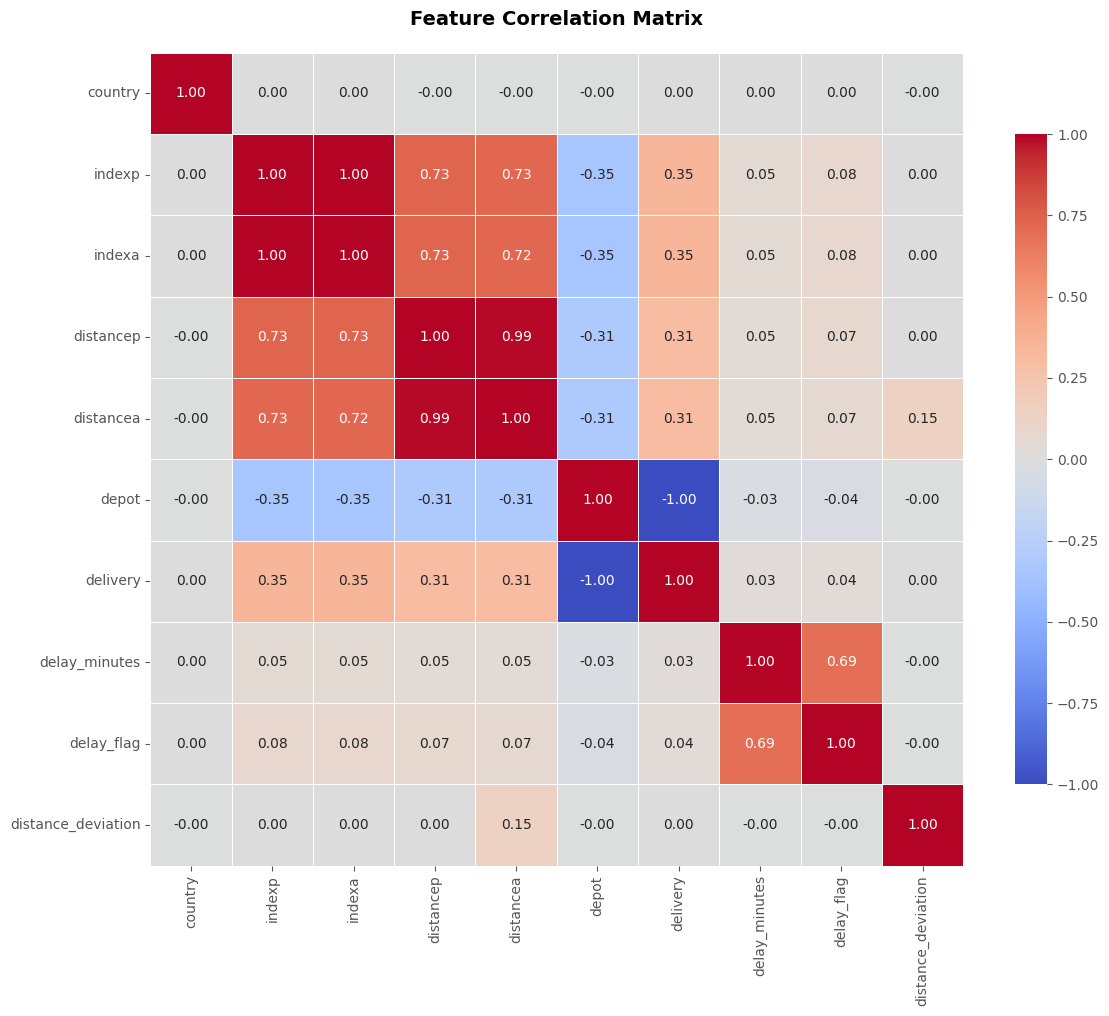


Top 10 Features Correlated with Delay Minutes:
delay_minutes         1.000000
delay_flag            0.691232
indexp                0.054553
indexa                0.054380
distancep             0.046801
distancea             0.046134
delivery              0.025104
depot                 0.025104
distance_deviation    0.001205
country               0.000326
Name: delay_minutes, dtype: float64


In [27]:
# Correlation matrix
print("=" * 80)
print("FEATURE CORRELATIONS")
print("=" * 80)

# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Exclude ID columns
corr_cols = [col for col in numeric_cols if col not in ['route_id', 'driver_id', 'stop_id', 'address_id', 'week_id']]

corr_matrix = df[corr_cols].corr()

# Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with delay
if 'delay_minutes' in corr_matrix.columns:
    print("\nTop 10 Features Correlated with Delay Minutes:")
    delay_corr = corr_matrix['delay_minutes'].abs().sort_values(ascending=False)
    print(delay_corr.head(10))


## 6. Temporal Patterns


TEMPORAL PATTERNS: DAY OF WEEK

Delay Rate by Day:
  Monday: 22.27%
  Tuesday: 22.52%
  Wednesday: 22.94%
  Thursday: 22.53%
  Friday: 22.42%
  Saturday: 18.81%
  Sunday: 19.19%


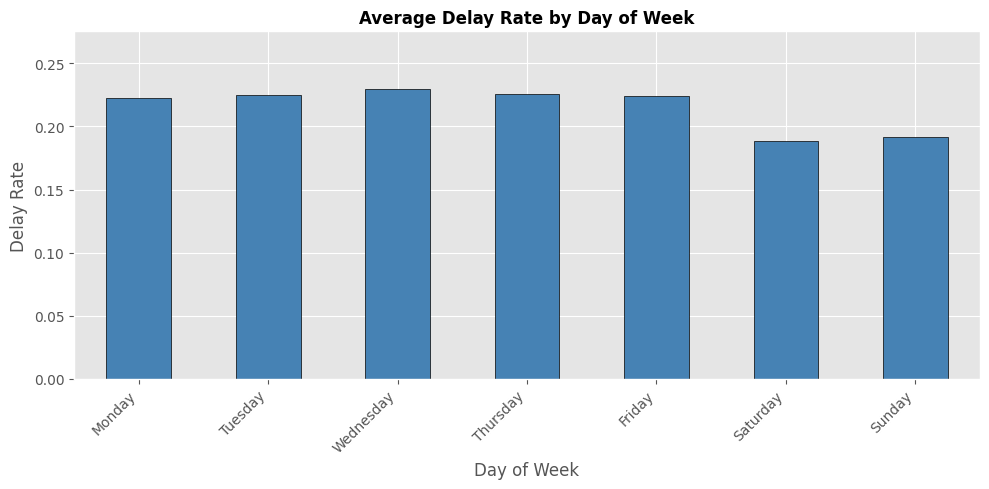

In [28]:
# Delays by day of week
print("=" * 80)
print("TEMPORAL PATTERNS: DAY OF WEEK")
print("=" * 80)

if 'day_of_week' in df.columns and 'delay_flag' in df.columns:
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_delay = df.groupby('day_of_week')['delay_flag'].mean().reindex(day_order)
    
    print("\nDelay Rate by Day:")
    for day, rate in day_delay.items():
        print(f"  {day}: {rate:.2%}")
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    day_delay.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
    ax.set_title('Average Delay Rate by Day of Week', fontsize=12, fontweight='bold')
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Delay Rate')
    ax.set_ylim(0, max(day_delay.max() * 1.2, 0.1))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


TEMPORAL PATTERNS: HOUR OF DAY


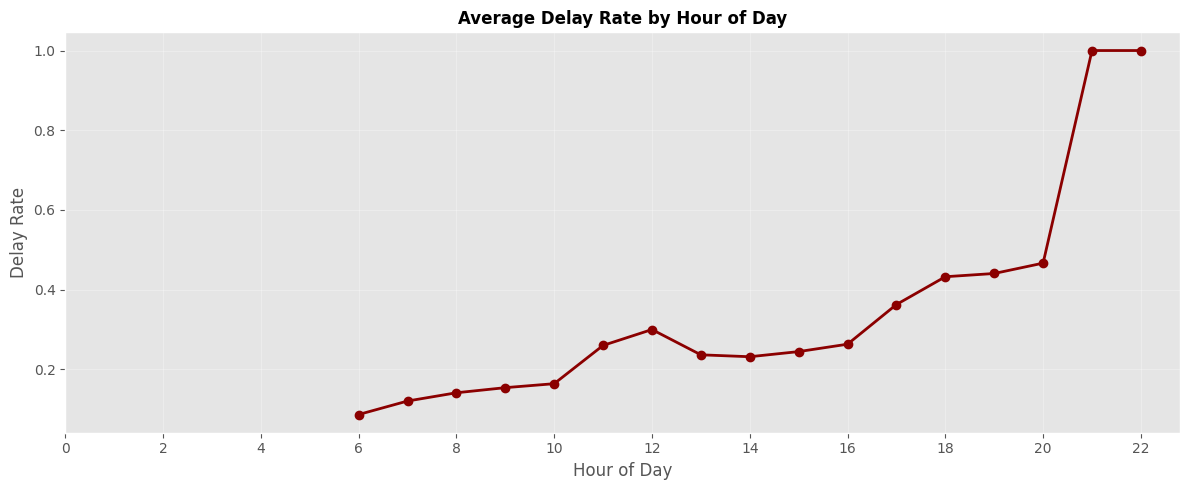


Peak delay hours:
  21:00 - 100.00%
  22:00 - 100.00%
  20:00 - 46.67%


In [29]:
# Delays by hour of day
print("=" * 80)
print("TEMPORAL PATTERNS: HOUR OF DAY")
print("=" * 80)

# Extract hour from arrived_time
if 'arrived_time' in df.columns:
    if df['arrived_time'].dtype == 'object':
        df['hour_of_arrival'] = pd.to_datetime(df['arrived_time'], format='%H:%M:%S', errors='coerce').dt.hour
    else:
        df['hour_of_arrival'] = pd.to_datetime(df['arrived_time'], errors='coerce').dt.hour
    
    if 'hour_of_arrival' in df.columns and 'delay_flag' in df.columns:
        hour_delay = df.groupby('hour_of_arrival')['delay_flag'].mean().sort_index()
        
        fig, ax = plt.subplots(1, 1, figsize=(12, 5))
        hour_delay.plot(kind='line', marker='o', ax=ax, color='darkred', linewidth=2, markersize=6)
        ax.set_title('Average Delay Rate by Hour of Day', fontsize=12, fontweight='bold')
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel('Delay Rate')
        ax.set_xticks(range(0, 24, 2))
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print("\nPeak delay hours:")
        top_hours = hour_delay.nlargest(3)
        for hour, rate in top_hours.items():
            print(f"  {int(hour):02d}:00 - {rate:.2%}")


## 7. Route & Driver Analysis


DRIVER ANALYSIS

Total drivers: 200

Top 10 drivers with highest delay rate:
  Driver 175: 26.17%
  Driver 81: 26.13%
  Driver 49: 26.12%
  Driver 145: 26.01%
  Driver 31: 25.70%
  Driver 177: 25.56%
  Driver 46: 25.54%
  Driver 142: 25.27%
  Driver 146: 25.03%
  Driver 152: 24.97%

Top 10 drivers with lowest delay rate:
  Driver 96: 18.60%
  Driver 166: 18.44%
  Driver 171: 18.35%
  Driver 195: 18.29%
  Driver 70: 18.26%
  Driver 128: 18.12%
  Driver 73: 18.09%
  Driver 163: 17.58%
  Driver 183: 17.28%
  Driver 79: 17.01%


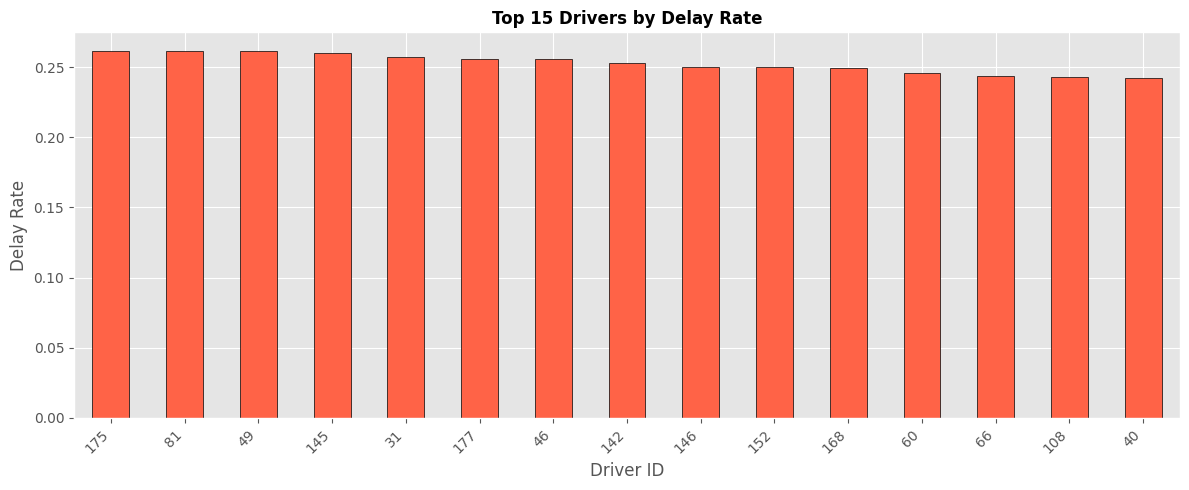

In [30]:
# Top drivers by delay rate
print("=" * 80)
print("DRIVER ANALYSIS")
print("=" * 80)

if 'driver_id' in df.columns and 'delay_flag' in df.columns:
    driver_delay = df.groupby('driver_id')['delay_flag'].mean().sort_values(ascending=False)
    
    print(f"\nTotal drivers: {len(driver_delay)}")
    print(f"\nTop 10 drivers with highest delay rate:")
    for driver_id, rate in driver_delay.head(10).items():
        print(f"  Driver {driver_id}: {rate:.2%}")
    
    print(f"\nTop 10 drivers with lowest delay rate:")
    for driver_id, rate in driver_delay.tail(10).items():
        print(f"  Driver {driver_id}: {rate:.2%}")
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    driver_delay.head(15).plot(kind='bar', ax=ax, color='tomato', edgecolor='black')
    ax.set_title('Top 15 Drivers by Delay Rate', fontsize=12, fontweight='bold')
    ax.set_xlabel('Driver ID')
    ax.set_ylabel('Delay Rate')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


ROUTE EFFICIENCY METRICS

Route Statistics:
  Total routes: 12000
  Avg stops per route: 19.5
  Avg total delay per route: 70.27 minutes
  Avg route efficiency: 1.000


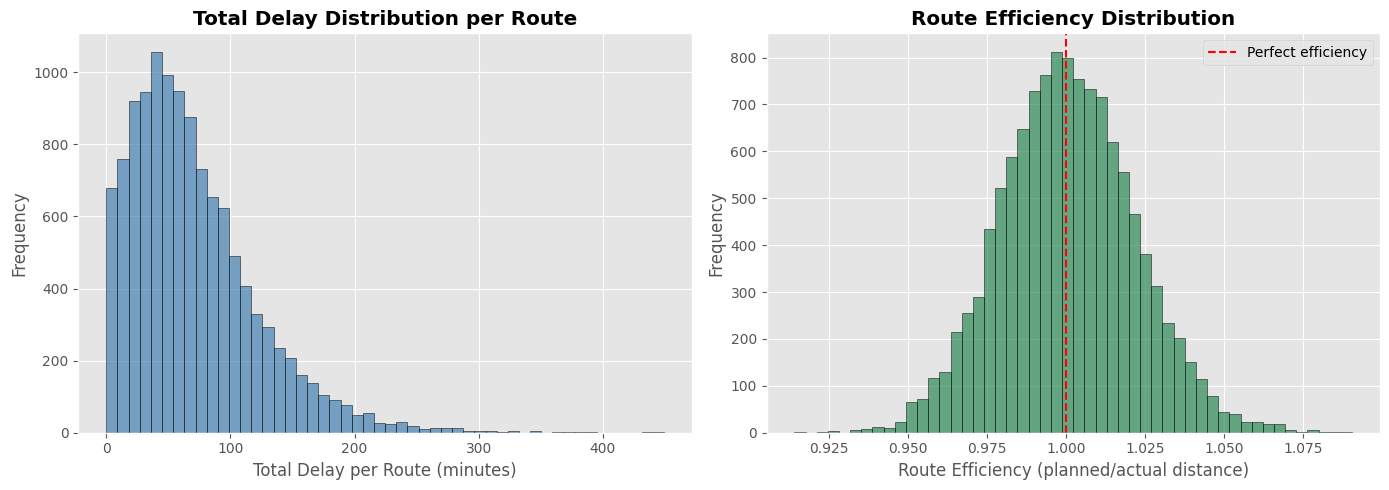

In [31]:
# Route efficiency metrics
print("=" * 80)
print("ROUTE EFFICIENCY METRICS")
print("=" * 80)

if 'route_id' in df.columns:
    route_stats = df.groupby('route_id').agg({
        'delay_minutes': ['sum', 'mean', 'count'],
        'distancep': 'sum',
        'distancea': 'sum'
    }).round(2)
    
    route_stats.columns = ['total_delay', 'avg_delay', 'num_stops', 'total_planned_dist', 'total_actual_dist']
    route_stats['efficiency'] = route_stats['total_planned_dist'] / (route_stats['total_actual_dist'] + 1e-6)
    
    print(f"\nRoute Statistics:")
    print(f"  Total routes: {len(route_stats)}")
    print(f"  Avg stops per route: {route_stats['num_stops'].mean():.1f}")
    print(f"  Avg total delay per route: {route_stats['total_delay'].mean():.2f} minutes")
    print(f"  Avg route efficiency: {route_stats['efficiency'].mean():.3f}")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].hist(route_stats['total_delay'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0].set_xlabel('Total Delay per Route (minutes)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Total Delay Distribution per Route', fontweight='bold')
    
    axes[1].hist(route_stats['efficiency'], bins=50, edgecolor='black', alpha=0.7, color='seagreen')
    axes[1].set_xlabel('Route Efficiency (planned/actual distance)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Route Efficiency Distribution', fontweight='bold')
    axes[1].axvline(1.0, color='red', linestyle='--', label='Perfect efficiency')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()


## 8. Data Quality Report


In [32]:
# Data quality checks
print("=" * 80)
print("DATA QUALITY REPORT")
print("=" * 80)

quality_checks = {}

# Check 1: Missing values
missing = df.isnull().sum().sum()
quality_checks['no_missing'] = missing == 0
print(f"\n✅ Missing values: {missing} ({'PASS' if missing == 0 else 'FAIL'})")

# Check 2: Delay rate
if 'delay_flag' in df.columns:
    delay_rate = df['delay_flag'].mean()
    quality_checks['delay_rate'] = 0.05 <= delay_rate <= 0.20
    status = 'PASS' if quality_checks['delay_rate'] else 'FAIL'
    print(f"✅ Delay rate: {delay_rate:.2%} ({status})")

# Check 3: Variance
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ['route_id', 'driver_id', 'stop_id', 'address_id', 'week_id', 'country', 'depot', 'delivery', 'delay_flag']]
min_std = df[numeric_cols].std().min()
quality_checks['variance'] = min_std > 0.01
status = 'PASS' if quality_checks['variance'] else 'FAIL'
print(f"✅ Minimum feature std: {min_std:.6f} ({status})")

# Check 4: Reasonable delays
if 'delay_minutes' in df.columns:
    max_delay = df['delay_minutes'].max()
    quality_checks['reasonable_delays'] = max_delay < 300
    status = 'PASS' if quality_checks['reasonable_delays'] else 'FAIL'
    print(f"✅ Max delay: {max_delay:.2f} minutes ({status})")

# Check 5: Route sizes
if 'route_id' in df.columns:
    route_sizes = df.groupby('route_id').size()
    avg_size = route_sizes.mean()
    quality_checks['route_sizes'] = 5 <= avg_size <= 40
    status = 'PASS' if quality_checks['route_sizes'] else 'FAIL'
    print(f"✅ Avg route size: {avg_size:.1f} stops ({status})")

# Summary
print("\n" + "-" * 80)
passed = sum(quality_checks.values())
total = len(quality_checks)
print(f"Quality Score: {passed}/{total} checks passed")
if passed == total:
    print("✅ Dataset quality is excellent!")
else:
    print("⚠️  Some quality checks failed. Review recommendations above.")


DATA QUALITY REPORT

✅ Missing values: 0 (PASS)
✅ Delay rate: 21.51% (FAIL)
✅ Minimum feature std: 2.503876 (PASS)
✅ Max delay: 180.00 minutes (PASS)
✅ Avg route size: 19.5 stops (PASS)

--------------------------------------------------------------------------------
Quality Score: 4/5 checks passed
⚠️  Some quality checks failed. Review recommendations above.


## Summary

This notebook provides a comprehensive exploration of the delivery dataset. Key insights:

- **Dataset size**: Number of records, routes, drivers
- **Target variables**: Delay rate and delay magnitude distributions
- **Feature distributions**: Distance metrics, route sizes, temporal patterns
- **Correlations**: Feature relationships and importance
- **Data quality**: Validation checks and recommendations

### Next Steps:
1. Review the visualizations and statistics above
2. If using improved dataset, proceed to training:
   ```bash
   python main.py --dataset data/improved_delivery_data.csv
   ```
3. Compare results with original dataset if needed
